# Benchmark: Convex hull computation

Benchmark comparing Minimum Bounding Rectangle computation across:

* [georust/geo](https://lib.rs/crates/geo) crate
* The [geos C library](https://trac.osgeo.org/geos/), used through high-level Rust bindings via the [geos](https://lib.rs/crates/geos) crate

## Benchmarked operation

Each iteration computes the convex hull of the multi-polygon representing all districts of India a 1,000 times.

# Prerequisites

Generate data:

```bash
cd harness
cargo build --release
LD_LIBRARY_PATH="${LD_LIBRARY_PATH}:/mnt/data/source/explore-georust/third_party/lib/geos/relwithdebinfo" target/release/benchmark_convex_hull --out-file ../analysis/benchmark_convex_hull/data.json --geojson-file ../data/india_districts/polbnda_ind.geojson --headlong --iterations 120
```

### Loading data from /mnt/data/source/explore-georust/analysis/benchmark_convex_hull/data.json
### Statistics: Raw data
                qps            
program         geo        geos
count    110.000000  110.000000
mean      29.273145    0.924078
std        7.598483    0.251965
min        5.559224    0.220298
25%       31.864726    0.856189
50%       32.792017    1.042285
75%       33.112324    1.099207
max       33.518961    1.111714


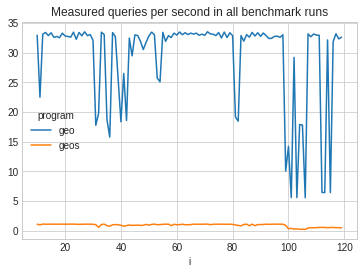

### Statistics: After outlier removal
               qps           
program        geo       geos
count    99.000000  99.000000
mean     31.261524   0.980528
std       4.278157   0.184580
min      15.776069   0.453079
25%      32.400043   0.931882
50%      32.859600   1.067160
75%      33.140870   1.100460
max      33.518961   1.111714


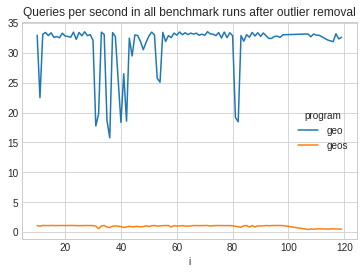

## Ratio of qps compared to geo
               qps
program       geos
count    99.000000
mean      0.032024
std       0.007588
min       0.013669
25%       0.030412
50%       0.033076
75%       0.033607
max       0.057078


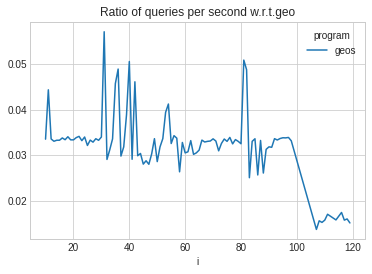

## Ratio of qps compared to geos
               qps
program        geo
count    99.000000
mean     33.565748
std      10.970913
min      17.520031
25%      29.755547
50%      30.233173
75%      32.882070
max      73.156883


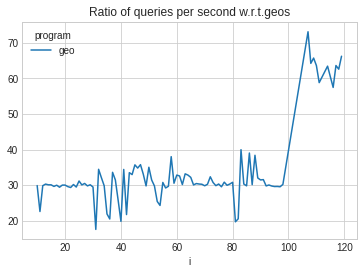

In [1]:
import os
data_absolute_path = os.path.join(os.getcwd(), 'data.json')
%run ../common/benchmark_analysis.ipynb

# Performance benchmarking

To generate the following SVG:

```bash
cd harness
cargo build --release

perf record -F 100 -g --call-graph dwarf -o ../analysis/benchmark_convex_hull/perf.data -- ./target/release/benchmark_convex_hull --geojson-file ../data/india_districts/polbnda_ind.geojson --out-file /dev/null --iterations 10 --headlong >/dev/null

cd ../analysis/benchmark_convex_hull
perf script -i perf.data | ../../third_party/stackcollapse-perf.pl > perf.collapsed-stacks.data
../../third_party/flamegraph.pl perf.collapsed-stacks.data > perf.svg
```

![](./perf.svg)

To dig in further, use
```
perf report -i perf.data --call-graph=fractal,0.5
```

# Further comparison

...work needed

geo::qhull algorithm seems fundamentally different from geos one. geos uses a two step algorithm. Spends half the time converting to a RO format, and half the time computing convex hull.

# Uber-optimized

When building without debug info, gcc -O3 is used. This makes geos faster.

```bash
LD_LIBRARY_PATH="${LD_LIBRARY_PATH}:/mnt/data/source/explore-georust/third_party/lib/geos/release" target/release/benchmark_convex_hull --out-file ../analysis/benchmark_convex_hull/data-nodbg.json --geojson-file ../data/india_districts/polbnda_ind.geojson --headlong --iterations 120
```

### Loading data from /mnt/data/source/explore-georust/analysis/benchmark_convex_hull/data-nodbg.json
### Statistics: Raw data
                qps            
program         geo        geos
count    110.000000  110.000000
mean      31.412607    4.630798
std        3.947262    0.404873
min       13.069058    2.883382
25%       32.155332    4.591659
50%       32.777549    4.832954
75%       33.068460    4.880647
max       33.386724    4.921343


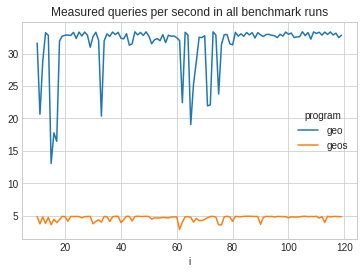

### Statistics: After outlier removal
               qps           
program        geo       geos
count    95.000000  95.000000
mean     32.583903   4.737558
std       1.082084   0.251393
min      25.329801   3.934080
25%      32.483500   4.705742
50%      32.843192   4.852974
75%      33.142707   4.885422
max      33.386724   4.921343


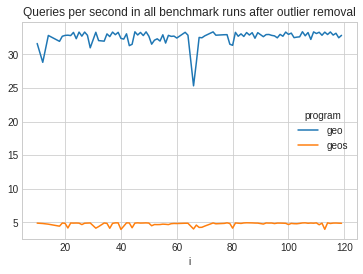

## Ratio of qps compared to geo
               qps
program       geos
count    95.000000
mean      0.145476
std       0.007660
min       0.118500
25%       0.145126
50%       0.147037
75%       0.148786
max       0.166990


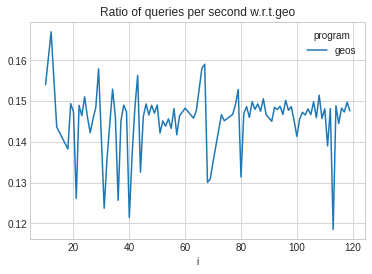

## Ratio of qps compared to geos
               qps
program        geo
count    95.000000
mean      6.894444
std       0.394659
min       5.988386
25%       6.721083
50%       6.801025
75%       6.890583
max       8.438798


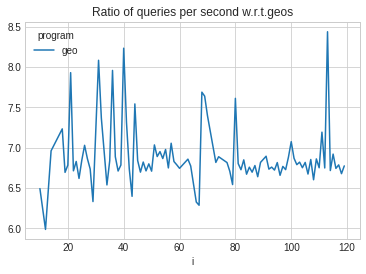

In [2]:
import os
data_absolute_path = os.path.join(os.getcwd(), 'data-nodbg.json')
%run ../common/benchmark_analysis.ipynb